<a href="https://colab.research.google.com/github/biiankac/PROJETOS-SoulCode/blob/main/Projeto3_Case_Airbnb_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO - PYHTON PARA ANÁLISE DE DADOS**

**Base de dados:** Airbnb

**Escola:** SoulCode Academy

**Curso:** Bootcamp Analista de Dados - Martech - AD2

**Professor:** Franciane Rodrigues

**Aluno:** Bianka Cristina da Silva Siqueira

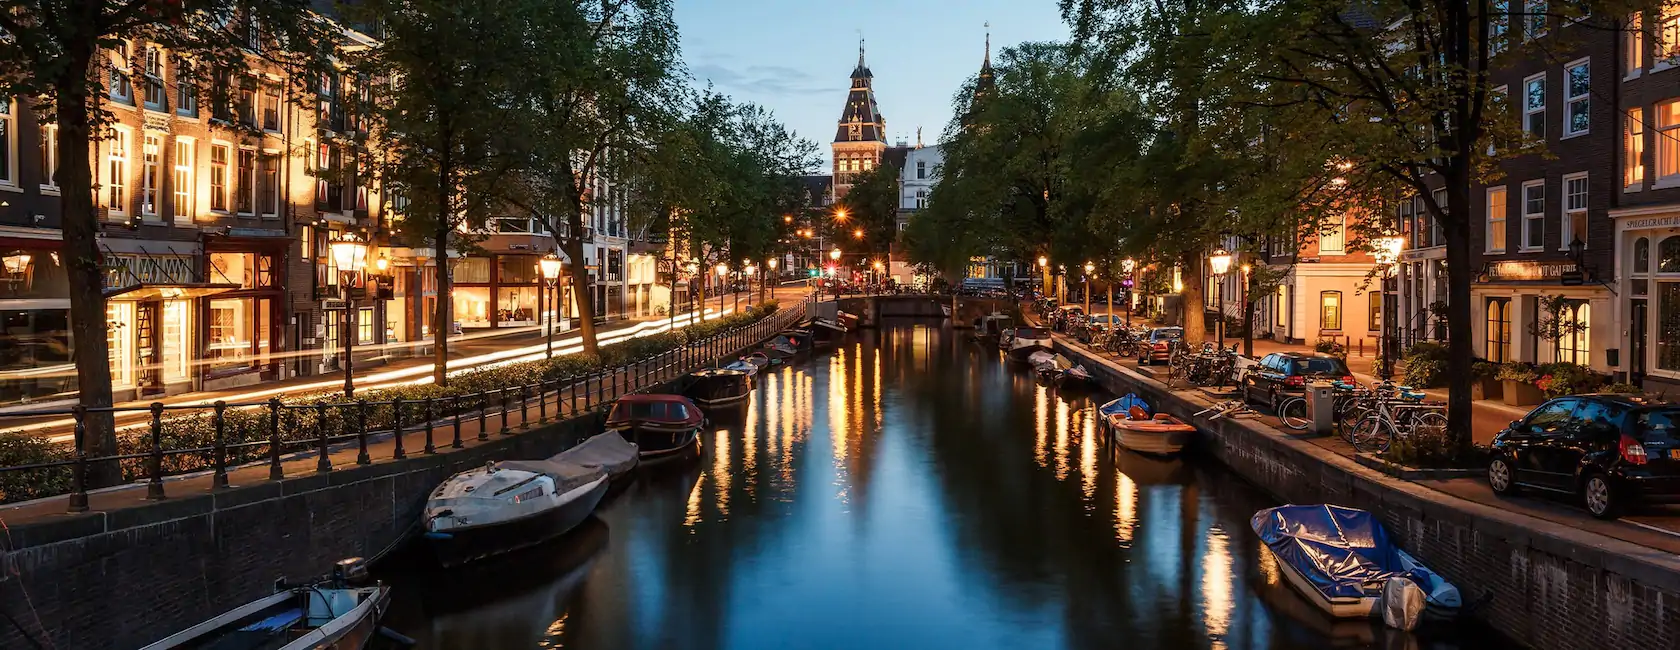

## **REQUISITOS**

**Pergunta de negócio:**

* Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

_________________________________________________________________


**Nível - Tratamento e Análise**

* Verificar todos os passos da estratégia geral de análise de
dados;
* Executar o que for necessário;
* Todos os passos devem ser comentados;
* Realizar no mínimo 3 análises apenas numéricas;
* Realizar plotagens para no mínimo 3 análises;
* Chegar a uma conclusão de sua análise;

_________________________________________________________________

**Nivel Infra**

* O Dataset deve ser salvo em ambiente local  (Google Drive) - (bruto e tratado);
* O Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado).

_________________________________________________________________

**O que será analisado:**

* Pontualidade;
* Organização de código;
* Atendimento aos requisitos;
* Capacidade de Pesquisa e Autonomia;
* Aplicação da Estratégia Geral de Análise de Dados;

_________________________________________________________________

**Links de apoio:**

* https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe
* https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
* https://zenodo.org/record/4446043#.Y9Y9ENJBwUE

## **SOBRE OS DADOS**

* Este conjunto de dados contém dados de preços do Airbnb de Amsterdã, incluindo características como número de quartos, tipo de quarto, status de host-superhost, distância do centro da cidade e outras comodidades.

### **Legenda de dados**

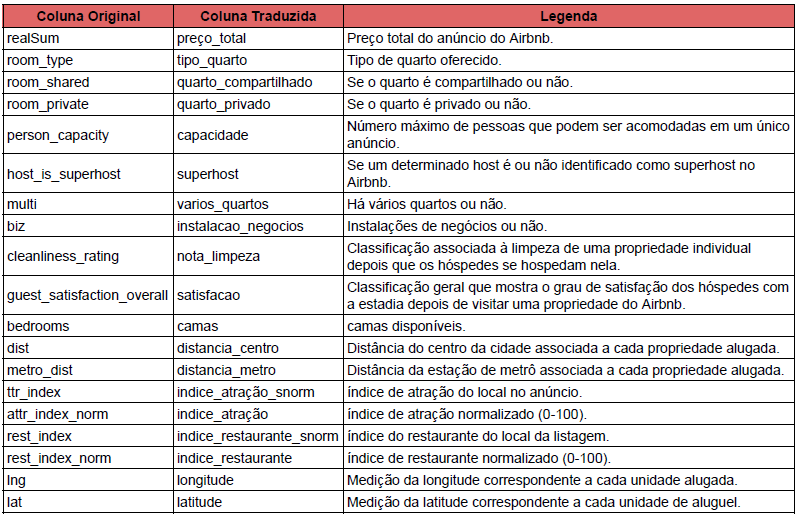

**Categorias excluídas da análise**
* quarto_compartilhado
* quarto_privado
* indice_atração_snorm
* indice_restaurante_snorm

## **INSTALAÇÕES E IMPORTAÇÕES**

In [ ]:
!pip install gcsfs # Instalando a biblioteca gcsfs para interagir com o Google Cloud Storage (GCS).
!pip install pandera # Instalando biblioteca pandera para validação de dados.

In [ ]:
import pandas as pd # Importando a biblioteca "pandas" que tem um apelido "pd" atribuída a ela.
import numpy as np # Importando a biblioteca "numpy" para resolução de problemas matemáticos e atribuindo "np" a ela.
import os # Importando a biblioteca "os" para interagir com o sistema operacional.
import pandera as pa # Importando a biblioteca "pandera" para validação de dados ao pandas, ou seja, para olhar as informações que temos e as comparar com regras que as regras definidass.
from google.cloud import storage # Esse módulo fornece funcionalidades para interagir com o serviço de armazenamento em nuvem do Google Cloud Platform (GCP)

In [ ]:
import warnings # Importando o módulo warnings para controlar a exibição de avisos.
warnings.filterwarnings("ignore") # Desativando seletivamente avisos específicos através da função filterwarnings.

## **EXTRAÇÃO DOS DADOS**

### **Google Drive**



In [ ]:
'''
# Abrindo o Google Drive

from google.colab import drive
drive.mount('/content/drive')
'''

In [ ]:
'''
# Extraindo a base de dados do Google Drive

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJETOS/airbnb.csv')
'''

### **Cloud Storage**

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/inlaid-booth-389812-74964e26fd16.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('arquivos_brutos')
bucket.blob('airbnb.csv')
path = 'gs://arquivos_brutos/airbnb.csv'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path)

## **PRÉ-ANALISE DOS DADOS**

Analisando a existência de células vazias e os tipos dos dados

In [ ]:
# Tamanho do df

df.shape

In [ ]:
# Analisando os dados detalhadamente

df.info()

In [ ]:
# Contando a quantidade de observações

df.count()

* Temos um df com 1103 linhas e 20 colunas, usando o df.info() observa-se que todas as linhas dos atibutos possuem registros, ou seja, não temos colunas com células vazias, o que está sendo confirmando com o uso do df.count().

* Com o uso do df.info() obtem-se também o tipos das variáveis.

## **TRANSFORMAÇÃO DOS DADOS**

In [ ]:
# Antes de iniciar a transformação será feito o backup local do df, caso seja necessário recuperar a base de dados original.

dfback1 = df.copy()

In [ ]:
# Calcular a porcentagem de valores nulos em cada coluna

porcentagem_nulos = (dfback1.isnull().sum() / len(df)) * 100
print(round(porcentagem_nulos,1))

### **Escolhendo as colunas que serão utilizadas na análise**

Analisando as colunas observa-se que existem duas colunas que passam a mesma informação, essas colunas são room_shared e room_private, pois se o quarto é compartilhado ele não pode ser privado e vise versa, porém antes de excluir uma das colunas será analisado se existe algum dado que informe que o quarto é compartilhado e privado ao mesmo tempo.

In [ ]:
qtcompartilhado = dfback1.room_shared == True # A variável qtcompartilhado está recebendo todos os registros que estão com True na coluna room_shared
qtprivado = dfback1.room_private == True # A variável qtcompartilhado está recebendo todos os registros que estão com True na coluna room_private

In [ ]:
dfback1.loc[qtcompartilhado & qtprivado]

# O df.loc está localizando no df se há quartos com registros que informem que os quartos são privados e compartilhados ao mesmo tempo

* Observando o código acima nota-se que não há registros que informem que os quartos são privados e compartilhados ao mesmo tempo, então pode-se escolher apenas uma das colunas para ser analisada.

* Optou-se por não utilizar colunas room_shared e room_private, pois as mesmas oferecem informações redundantes com a coluna room_type.

* As colunas attr_index e rest_index serão removidas, pois as mesmas serão utilizadas com os dados normalizados.





Colunas a serem usadas na análise:

* realSum                       
* room_type                                        
* person_capacity               
* host_is_superhost
* multi                                    
* biz                           
* cleanliness_rating            
* guest_satisfaction_overall  
* bedrooms                     
* dist                          
* metro_dist                                     
* attr_index_norm                                
* rest_index_norm               
* lng                           
* lat

In [ ]:
# Visualiza valores unicos para ver inconsistências
print(sorted(pd.unique(dfback1['realSum'])))
print(sorted(pd.unique(dfback1['room_type'])))
print(sorted(pd.unique(dfback1['person_capacity'])))
print(sorted(pd.unique(dfback1['multi'])))
print(sorted(pd.unique(dfback1['host_is_superhost'])))
print(sorted(pd.unique(dfback1['biz'])))
print(sorted(pd.unique(dfback1['cleanliness_rating'])))
print(sorted(pd.unique(dfback1['guest_satisfaction_overall'])))
print(sorted(pd.unique(dfback1['bedrooms'])))
print(sorted(pd.unique(dfback1['dist'])))
print(sorted(pd.unique(dfback1['metro_dist'])))
print(sorted(pd.unique(dfback1['attr_index_norm'])))
print(sorted(pd.unique(dfback1['rest_index_norm'])))
print(sorted(pd.unique(dfback1['lng'])))
print(sorted(pd.unique(dfback1['lat'])))

[128.88711831837463, 143.65055187120663, 144.82225294682823, 161.9290886509034, 165.67853209289248, 167.3189135987627, 175.75516134323811, 177.16120263398403, 178.0985634944813, 180.20762543060016, 181.8480069364704, 184.4257493028379, 188.17519274482692, 191.6902959716917, 192.8619970473133, 194.03369812293488, 196.6114404893024, 198.9548426405456, 199.89220350104284, 201.53258500691305, 202.70428608253465, 204.1103273732805, 205.2820284489021, 206.4537295245237, 208.7971316757669, 209.03147189089125, 210.2031729665128, 213.95261640850188, 215.12431748412348, 217.70205985049097, 218.63942071098825, 218.8737609261125, 221.2171630773557, 221.45150329248003, 225.66962716471772, 227.310008670588, 228.71604996133388, 230.82511189745276, 232.23115318819865, 233.63719447894456, 234.57455533944184, 237.85531835118223, 238.3239987814309, 239.4956998570525, 239.7300400721768, 241.1360813629227, 241.83910200829567, 242.07344222342, 243.2451432990416, 244.4168443746632, 245.5885454502848, 245.822

In [ ]:
# Remover linhas com valores NaN

df = df.dropna()

### **Limpeza dos dados**

In [ ]:
# Retirada de colunas que não serão utilizadas na analise

df.drop(['Unnamed: 0',
         'room_shared',
         'room_private',
         'attr_index',
         'rest_index'],axis=1,inplace=True)

### **Renomeando as colunas**

In [ ]:
df.rename(columns={'realSum':'preço_total',
                   'room_type':'tipo_quarto',
                   'room_shared':'compartilhado',
                   'person_capacity':'capacidade',
                   'host_is_superhost': 'superhost',
                   'multi':'varios_quartos',
                   'biz':'instalacao_negocios',
                   'cleanliness_rating':'nota_limpeza',
                   'guest_satisfaction_overall':'satisfacao',
                   'bedrooms':'camas',
                   'dist':'distancia_centro',
                   'metro_dist':'distancia_metro',
                   'attr_index_norm':'indice_atração',
                   'rest_index_norm':'indice_restaurante',
                   'lng':'longitude',
                   'lat':'latitude'},inplace=True)

### **Renomeando os registros das variáveis categóricas**

In [ ]:
# Encontrando oa registros que parecem na coluna tipo_quarto, que é a nossa única variável cetegórica.

df['tipo_quarto'].unique()

In [ ]:
# Criando uma legenda de dados com as traduções desejadas e colocando-os no dicionário.

traducao_tipo_quarto = {
    'Private room': 'Quarto privado',
    'Entire home/apt': 'Apt/casa inteira',
    'Shared room': 'Quarto compartilhado'
}

In [ ]:
# Traduzindo todos os registros da coluna tipo_quarto de acordo com a legenda criada no dicionário acima.

df['tipo_quarto'].replace(traducao_tipo_quarto,inplace=True)

In [ ]:
df['tipo_quarto'].unique()

## **TIPAGEM**

In [ ]:
df.info()

In [ ]:
# Transformando os registros da coluna capacidade de float para int.

df['capacidade'] = df['capacidade'].astype(int)

In [ ]:
# Transformando os registros da coluna capacidade de int para bool.

df['instalacao_negocios'] = df['instalacao_negocios'].astype(bool)

In [ ]:
# Transformando os registros da coluna varios_quartos de int para bool.

df['varios_quartos'] = df['varios_quartos'].astype(bool)

In [ ]:
df.info()

## **QUALIDADE E INTEGRIDADE DOS DADOS**

In [ ]:
schema = pa.DataFrameSchema({'preço_total': pa.Column(pa.Float),
                            'tipo_quarto': pa.Column(pa.Object),
                            'capacidade': pa.Column(pa.Int),
                            'superhost': pa.Column(pa.Bool),
                            'varios_quartos': pa.Column(pa.Bool),
                            'instalacao_negocios': pa.Column(pa.Bool),
                            'nota_limpeza': pa.Column(pa.Float),
                            'satisfacao': pa.Column(pa.Float),
                            'camas': pa.Column(pa.Int),
                            'distancia_centro': pa.Column(pa.Float),
                            'distancia_metro': pa.Column(pa.Float),
                            'indice_atração': pa.Column(pa.Float),
                            'indice_restaurante': pa.Column(pa.Float),
                            'longitude': pa.Column(pa.Float),
                            'latitude': pa.Column(pa.Float)
                            })

# Validar o DataFrame
schema.validate(df)

In [ ]:
# Backup local do df tratado
dfback2 = df.copy()

## **CARREGAMENTO**

### **Google Drive**

In [ ]:
'''
df.to_csv('/content/drive/MyDrive/Colab Notebooks/PROJETOS/airbnb_tratado.csv',index=False)
'''

### **Cloud Storage**

In [ ]:
df.to_csv('gs://arquivos_tratados/airbnb_tratado.csv', index=False)

## **ANÁLISE  E VISUALIZAÇÃO**

* Antes de realizar as análises entre as colunas selecionadas, serão realizadas correlações entre as colunas que pretende-se comparar, para ser decido se será realizado ou não uma análise mais detalhada. Uma correlação considerada de moderada a forte será aquela que apresentar o seu índice maior ou igual a 0,1.

In [ ]:
# Abertura de biblioteca de visualização
import matplotlib.pyplot as plt

### **1. Analise entre o tipo de quarto e a satisfação dos clientes**

* Analisar se certos tipos de quarto possuem maior nível de satisfação entre os clientes pode fornecer insights sobre as preferências dos hóspedes em relação ao tipo de locação (quarto privado, ap/casa completa ou quarto compartilhado).

In [ ]:
# Calcular a contagem total de cada tipo de quarto

contagem_total_tq = df.groupby('tipo_quarto').size()
print("Contagem total de cada tipo de quarto:")
print(contagem_total_tq)

# Calcular a média e desvio padrão de satisfação para cada tipo de quarto

media_satisfacao_tq = df.groupby('tipo_quarto')['satisfacao'].agg(['mean', 'std']).round(1)
print("\nMédia e desvio padrão de satisfação dos clientes para cada tipo de quarto:")
print(media_satisfacao_tq)

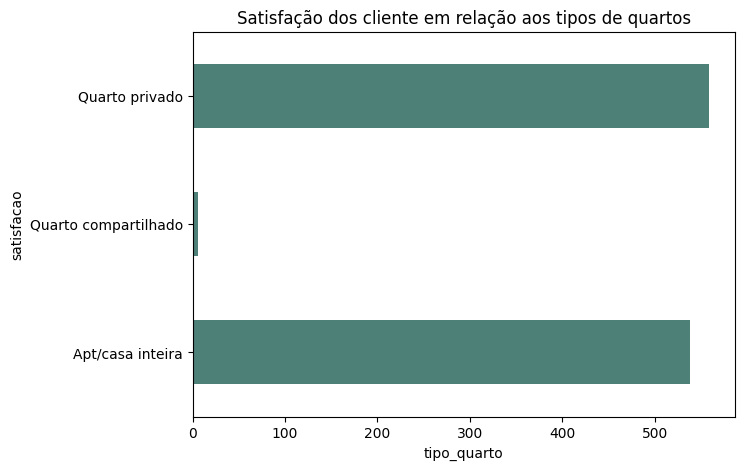

In [ ]:
# Gráfico de barras horizontal
contagem_total_tq.plot.barh(figsize=(7,5), color=['#4D8076'])
plt.xlabel('tipo_quarto')
plt.ylabel('satisfacao')
plt.title('Satisfação dos cliente em relação aos tipos de quartos')
plt.show()



_________________________________________________________________
### **2. Análise entre capacidade de pessoas e satisfação dos clientes**

* Analisar se os hospedes concrodam que a capacidade de pessoas indicada no anúncio condiz com a experiência obtidas pelos mesmos.



In [ ]:
df_comp1 = df[['capacidade', 'satisfacao']]

In [ ]:
correlacao1 = df_comp1['capacidade'].corr(df_comp1['satisfacao'])
print(f'Correlação entre classificação de limpeza e satisfação dos clientes: {correlacao1:.2}')

* Nota-se que o índice de correlação está próximo de 0 o que indica uma correlação fraca ou inexistente entre as variáveis.

_________________________________________________________________
### **3. Análise entre uma locação ser superhost e satisfação dos clientes**

* Investigar se os superhosts têm uma classificação geral de satisfação mais alta em comparação com os não superhosts. Isso pode indicar se o status de superhost tem impacto na experiência dos hóspedes.

In [ ]:
df_comp2 = df[['superhost', 'satisfacao']]

In [ ]:
correlacao2 = df_comp2['superhost'].corr(df_comp2['satisfacao'])
print(f'Correlação entre superhost e satisfação dos clientes: {correlacao2:.2}')

* Uma correlação de 0.3 sugere que há uma associação razoável e positiva entre ser um superhost e a satisfação geral dos hóspedes.

In [ ]:
media_satisfacao_sp = df.groupby('superhost')['satisfacao'].mean().round(2)
print("\nMédia satisfação dos clientes para locação superhost:")
print(media_satisfacao_sp)

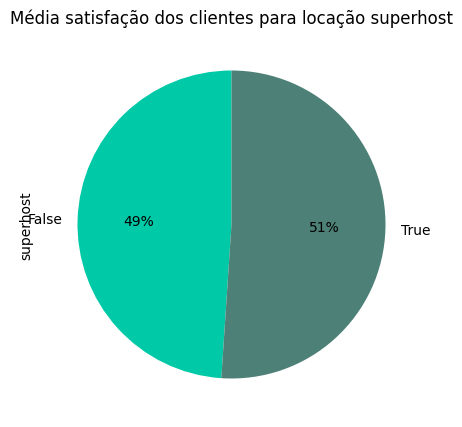

In [ ]:
# Gráfico de setores

colors = ['#00C9A7', '#4D8076']
media_satisfacao_sp.plot(kind='pie',
                         ylabel= 'superhost',
                         figsize=(7, 5),
                         autopct='%1.0f%%',
                         startangle=90,
                         colors=colors)
plt.title('Média satisfação dos clientes para locação superhost')
plt.show()

_________________________________________________________________

_________________________________________________________________
### **4. Análise da relação entre quantidade de quartos e a satisfação dos clientes**

* Essa análise fornece insights sobre as preferências dos clientes, orientando as decisões estratégicas dos anfitriões e proprietários.

In [ ]:
df_comp10 = df[['varios_quartos', 'satisfacao']]

In [ ]:
correlacao10 = df_comp10['varios_quartos'].corr(df_comp10['satisfacao'])
print(f'Correlação entre quantidade de quartos e satisfação dos clientes: {correlacao10:.2}')

Correlação entre quantidade de quartos e satisfação dos clientes: -0.051


* Nota-se que o índice de correlação está próximo de 0 o que indica uma correlação fraca ou inexistente entre as variáveis.

_________________________________________________________________
### **5. Análise entre uma locação ter espaço para negócios e satisfação dos clientes**

* Essa análise é importante para entender as necessidades e preferências dos hóspedes e atrair segmentos de mercado específicos.

In [ ]:
df_comp = df[['instalacao_negocios', 'satisfacao']]

In [ ]:
correlacao = df_comp['instalacao_negocios'].corr(df_comp['satisfacao'])
print(f'Correlação entre locação ter espaço para negócios e satisfação dos clientes: {correlacao:.2}')

Correlação entre locação ter espaço para negócios e satisfação dos clientes: -0.12


* Uma correlação de -0.12 sugere que não há uma relação forte ou consistente entre a presença de espaço para negócios na locação e a satisfação geral dos hóspedes, ou seja, a disponibilidade desse recurso não parece ter um impacto significativo ou consistente na satisfação dos hóspedes.

_________________________________________________________________
### **6. Análise da relação entre a limpeza e a satisfação dos clientes**

* Avaliar se a classificação de limpeza tem correlação com a satisfação geral dos hóspedes. Isso pode ajudar a determinar a importância da limpeza na experiência dos hóspedes.


In [ ]:
df_comp3 = df[['nota_limpeza', 'satisfacao']]

In [ ]:
correlacao3 = df_comp3['nota_limpeza'].corr(df_comp3['satisfacao'])
print(f'Correlação entre classificação de limpeza e satisfação dos clientes: {correlacao3:.2}')

Correlação entre classificação de limpeza e satisfação dos clientes: 0.65


* Uma correlação de 0.65 sugere que há uma associação significativa e positiva entre a classificação de limpeza e a satisfação geral dos hóspedes.

In [ ]:
media_satisfacao_limp = df.groupby('nota_limpeza')['satisfacao'].mean().round(2)
print("\nMédia satisfação dos clientes para locação com limpeza:")
print(media_satisfacao_limp)


Média satisfação dos clientes para locação com limpeza:
nota_limpeza
4.0     63.50
5.0     80.00
6.0     66.67
7.0     82.36
8.0     88.36
9.0     92.58
10.0    96.75
Name: satisfacao, dtype: float64


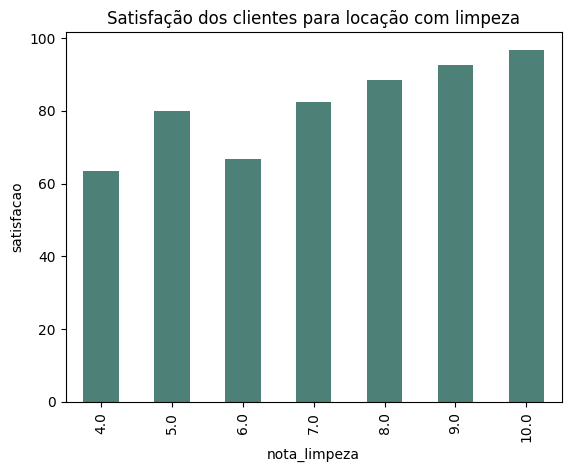

In [ ]:
# Gráfico de barras empilhadas

media_satisfacao_limp.plot(kind='bar', stacked=True, color='#4D8076')
plt.xlabel('nota_limpeza')
plt.ylabel('satisfacao')
plt.title('Satisfação dos clientes para locação com limpeza')
plt.show()

_________________________________________________________________
### **7. Análise da relação entre quantidade de camas e a satisfação dos clientes**

* Essa análise fornece insights sobre as preferências dos clientes, orientando as decisões estratégicas dos anfitriões e proprietários.

In [ ]:
df_comp9 = df[['camas', 'satisfacao']]

In [ ]:
correlacao9 = df_comp9['camas'].corr(df_comp9['satisfacao'])
print(f'Correlação entre quantidade de camas e satisfação dos clientes: {correlacao9:.2}')

Correlação entre quantidade de camas e satisfação dos clientes: 0.1


* Uma correlação de 0.1 sugere que há uma associação muito leve e positiva entre a quantidade de quartos e a satisfação geral dos hóspedes.

In [ ]:
media_satisfacao_qq = df.groupby('camas')['satisfacao'].mean().round(2)
print("\nMédia satisfação dos clientes com a quantidade de camas:")
print(media_satisfacao_qq)


Média satisfação dos clientes com a quantidade de camas:
camas
0    92.34
1    94.27
2    94.92
3    95.82
4    95.86
5    92.00
Name: satisfacao, dtype: float64


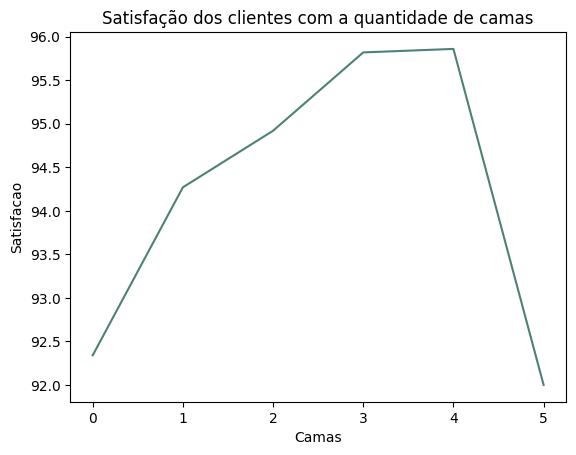

In [ ]:
# Gráfico de linha

media_satisfacao_qq.plot(kind='line', color='#4D8076')
plt.xlabel('Camas')
plt.ylabel('Satisfacao')
plt.title('Satisfação dos clientes com a quantidade de camas')
plt.show()

_________________________________________________________________
### **8. Análise do impacto da distância até o metrô ou ao centro da cidade na satisfação dos clientes**

* Analisar se a proximidade do imóvel ao metrô ou ao centro da cidade tem influência na satisfação geral dos hóspedes. Isso pode ser útil para identificar se a acessibilidade é um fator importante para os hóspedes.

In [ ]:
df_comp4 = df[['distancia_metro', 'satisfacao']]

In [ ]:
correlacao4 = df_comp4['distancia_metro'].corr(df_comp4['satisfacao'])
print(f'Correlação entre classificação de limpeza e satisfação dos clientes: {correlacao4:.2}')

Correlação entre classificação de limpeza e satisfação dos clientes: 0.051


* Nota-se que o índice de correlação está próximo de 0 o que indica uma correlação fraca ou inexistente entre as variáveis.

In [ ]:
df_comp5 = df[['distancia_centro', 'satisfacao']]

In [ ]:
correlacao5 = df_comp5['distancia_centro'].corr(df_comp5['satisfacao'])
print(f'Correlação entre classificação de limpeza e satisfação dos clientes: {correlacao5:.2}')

Correlação entre classificação de limpeza e satisfação dos clientes: -0.06


* Nota-se que o índice de correlação está próximo de 0 o que indica uma correlação fraca ou inexistente entre as variáveis.

_________________________________________________________________
### **9. Análise das classificações de atrações locais e restaurantes  com a satisfação geral dos clientes**

* Analisar se as avaliações de atrações e restaurantes próximos têm correlação com a satisfação geral dos hóspedes. Isso pode indicar se a disponibilidade de locais interessantes nas proximidades influencia a experiência dos hóspedes.

In [ ]:
df_comp6 = df[['indice_atração', 'satisfacao']]

In [ ]:
correlacao6 = df_comp6['indice_atração'].corr(df_comp6['satisfacao'])
print(f'Correlação entre classificação de limpeza e satisfação dos clientes: {correlacao6:.2}')

Correlação entre classificação de limpeza e satisfação dos clientes: 0.0063


* Nota-se que o índice de correlação está próximo de 0 o que indica uma correlação fraca ou inexistente entre as variáveis.

In [ ]:
df_comp7 = df[['indice_restaurante', 'satisfacao']]

In [ ]:
correlacao7 = df_comp7['indice_restaurante'].corr(df_comp7['satisfacao'])
print(f'Correlação entre classificação de limpeza e satisfação dos clientes: {correlacao7:.2}')

Correlação entre classificação de limpeza e satisfação dos clientes: -0.0049


* Nota-se que o índice de correlação está próximo de 0 o que indica uma correlação fraca ou inexistente entre as variáveis.

* Observa-se que há apenas uma área em expecífico que apresenta um alto preço, as demais áreas possuem uma média de preço parecida.

_________________________________________________________________
### **10. Análise dos preços totais com a classificação de limpeza**

* Analisar se imóveis com preços mais altos geralmente são associados a experiências melhores por causa da limpeza e, portanto, melhores avaliações.

In [ ]:
df_comp8 = df[['preço_total', 'nota_limpeza']]

In [ ]:
correlacao8 = df_comp8['preço_total'].corr(df_comp8['nota_limpeza'])
print(f'Correlação entre classificação de limpeza e preço total: {correlacao8:.2}')

Correlação entre classificação de limpeza e preço total: 0.023


* Nota-se que o índice de correlação está próximo de 0 o que indica uma correlação fraca ou inexistente entre as variáveis.

_________________________________________________________________
### **11. Análise dos preços totais com tipo de quarto**

* Analisar o preços dos imóveis com suas características físicas ajuda a definir estratégias de precificação e identifica oportunidades de investimento, ou seja, essa análise pode ser útil tanto para anfitriões individuais que desejam otimizar suas listagens quanto para investidores imobiliários que buscam insights para tomar decisões informadas sobre suas propriedades no Airbnb.

In [ ]:
df_preco_quarto = df.groupby("tipo_quarto")["preço_total"].describe().round(2)
print(df_preco_quarto)

                      count    mean     std     min     25%     50%     75%  \
tipo_quarto                                                                   
Apt/casa inteira      538.0  733.18  503.59  128.89  454.85  625.34  841.93   
Quarto compartilhado    6.0  280.97  103.30  192.86  221.28  258.01  281.03   
Quarto privado        559.0  366.76  180.29  143.65  258.24  319.64  410.56   

                          max  
tipo_quarto                    
Apt/casa inteira      7782.91  
Quarto compartilhado   479.23  
Quarto privado        1714.43  


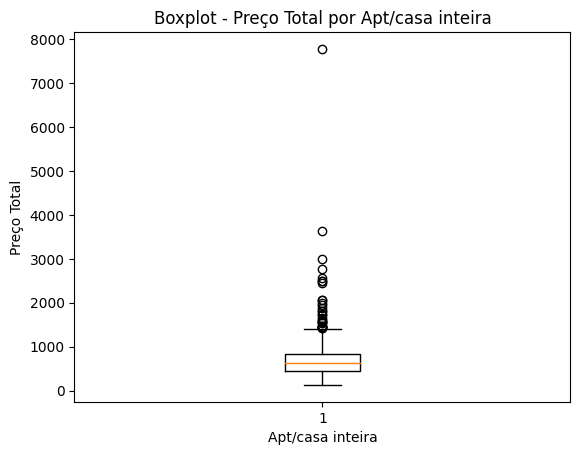

In [ ]:
# Criar o gráfico de boxplot para cada tipo de quarto

plt.boxplot([df[df["tipo_quarto"] == "Apt/casa inteira"]["preço_total"]])
plt.xlabel("Apt/casa inteira")
plt.ylabel("Preço Total")
plt.title("Boxplot - Preço Total por Apt/casa inteira")
plt.show()

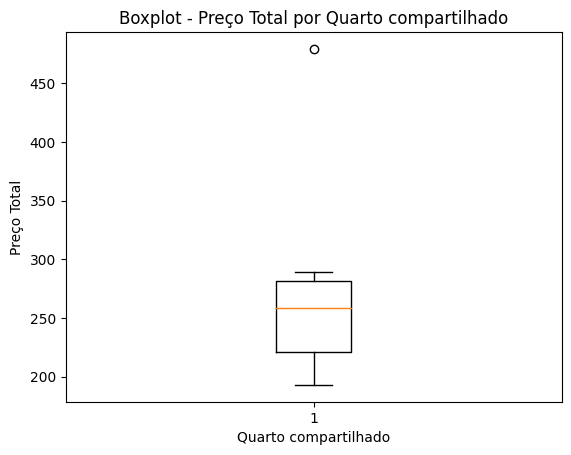

In [ ]:
plt.boxplot([df[df["tipo_quarto"] == "Quarto compartilhado"]["preço_total"]])
plt.xlabel("Quarto compartilhado")
plt.ylabel("Preço Total")
plt.title("Boxplot - Preço Total por Quarto compartilhado")
plt.show()

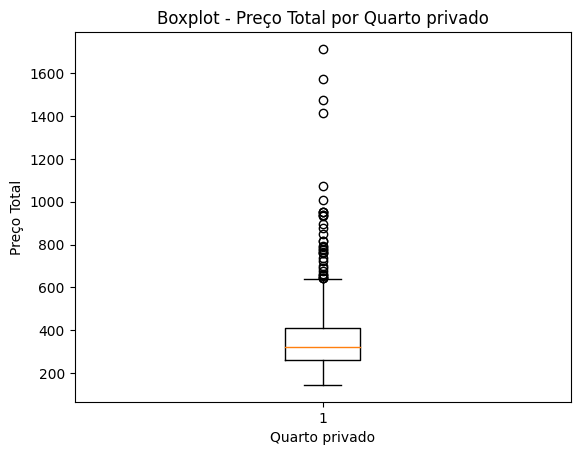

In [ ]:
plt.boxplot([df[df["tipo_quarto"] == "Quarto privado"]["preço_total"]])
plt.xlabel("Quarto privado")
plt.ylabel("Preço Total")
plt.title("Boxplot - Preço Total por Quarto privado")
plt.show()

## **FILTROS**

* Através dos filtros vamos analisar quantas avaliações acima de 70% (considerada alta satisfação) e quantas avaliações abaixo de 50% (considerada baixa satisfação) o airbnb recebeu dos clientes.

In [ ]:
# Filtro para mais de 70% de satisfação

alta_satisfacao = (df.satisfacao >= 70)
df.loc[alta_satisfacao]

quantidade_alta_satisfacao = len(df.loc[alta_satisfacao])
print(quantidade_alta_satisfacao)

1097


In [ ]:
# Filtro para menos de 50% de satisfação

baixa_satisfacao = (df['satisfacao'] <= 50)
df.loc[baixa_satisfacao]

quantidade_baixa_satisfacao = len(df.loc[baixa_satisfacao])
print(quantidade_baixa_satisfacao)

2


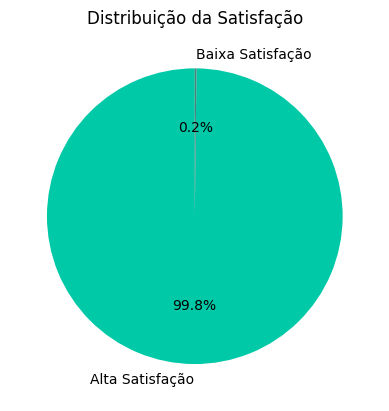

In [ ]:
# Gráfico de setores
colors = ['#00C9A7', '#4D8076']
labels = ['Alta Satisfação', 'Baixa Satisfação']
quantidades = [quantidade_alta_satisfacao, quantidade_baixa_satisfacao]
plt.pie(quantidades, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição da Satisfação')
plt.show()

## **CONCLUSÕES**

* Através da análise 1 concluiu-se que há uma preferência maior dos clientes em relação a os quartos privados e apartamentos ou casa.

* Na análise 3 observa-se que em média, os hóspedes tendem a apresentar uma satisfação geral maior ao se hospedarem com anfitriões que possuem o status de superhost.

* A análise 6 sugere que satisfação dos hóspedes tende a aumentar à medida que a nota de limpeza melhora.

* Observa-se através da análise 7 que em média, um número ligeiramente maior de camas pode estar relacionado a uma satisfação um pouco maior dos hóspedes.

* Através dos boxplots da análise 11 notou-se bastante presença de outliers nos tipos de quartos Apt/casa inteira e Quarto privado essa análise pode indicar a variação do preço devidos as características únicas dos imóveis, como por exemplo, os imóveis mais limpos, com superhost, localização privilegiada podem ter um preço acima da média, resultando em um outliers de alto valor.

* Ao analisar o resultado obtido pelo filtro noutou-se que o airbnb está bem avaliado pelos seus clientes.